In [2]:
import sympy as sym
import numpy as np

In [38]:
def rotationGlobalX(alpha):
    return np.array([[1,0,0],[0,np.cos(alpha),-np.sin(alpha)],[0,np.sin(alpha),np.cos(alpha)]])

def rotationGlobalY(beta):
    return np.array([[np.cos(beta),0,np.sin(beta)], [0,1,0],[-np.sin(beta),0,np.cos(beta)]])

def rotationGlobalZ(gamma):
    return np.array([[np.cos(gamma),-np.sin(gamma),0],[np.sin(gamma),np.cos(gamma),0],[0,0,1]])

def rotationLocalX(alpha):
    return np.array([[1,0,0],[0,np.cos(alpha),np.sin(alpha)],[0,-np.sin(alpha),np.cos(alpha)]])

def rotationLocalY(beta):
    return np.array([[np.cos(beta),0,-np.sin(beta)], [0,1,0],[np.sin(beta),0,np.cos(beta)]])

def rotationLocalZ(gamma):
    return np.array([[np.cos(gamma),np.sin(gamma),0],[-np.sin(gamma),np.cos(gamma),0],[0,0,1]])

<IPython.core.display.Javascript object>


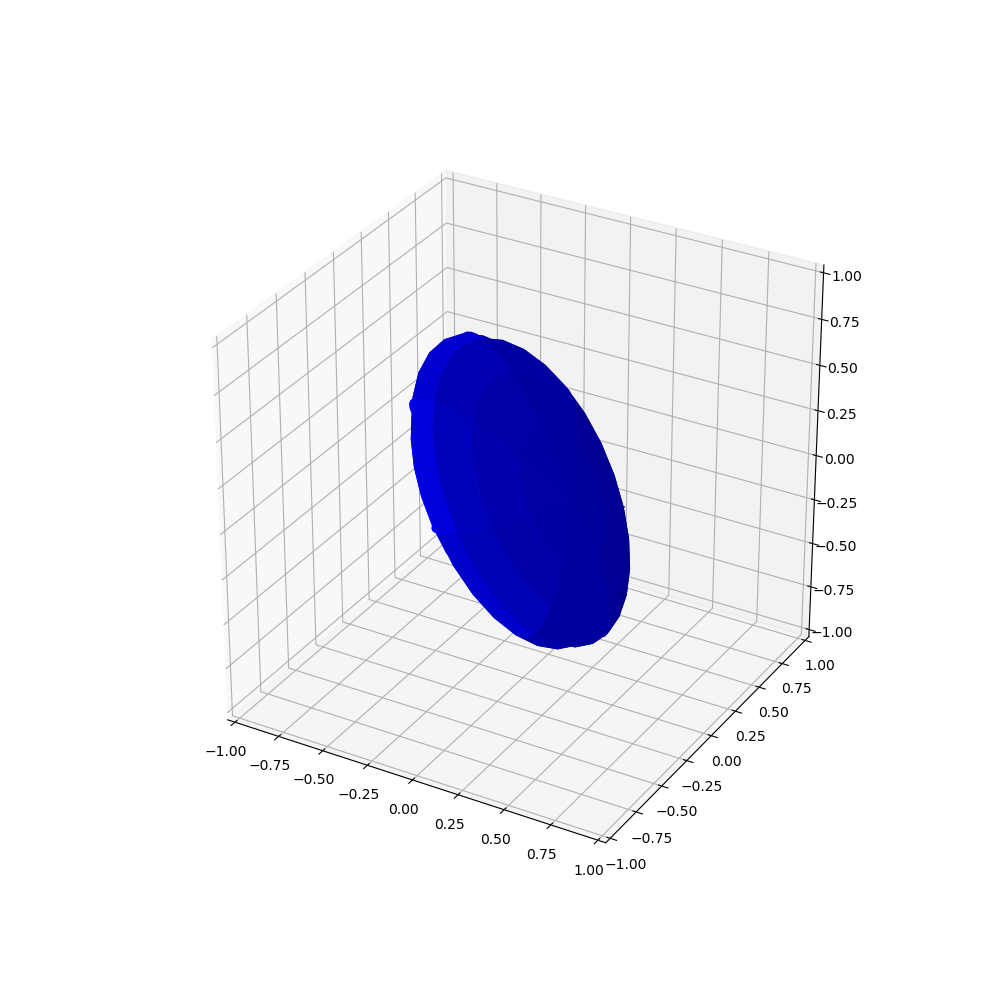

(3, 900)


In [115]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
plt.rcParams['figure.figsize']=10,10


coefs = (1, 3, 15)  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
# Radii corresponding to the coefficients:
rx, ry, rz = 1/np.sqrt(coefs)

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 30)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))


fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

xr = np.reshape(x, (1,-1))
yr = np.reshape(y, (1,-1))
zr = np.reshape(z, (1,-1))

RX = rotationGlobalX(np.pi/3)
RY = rotationGlobalY(np.pi/3)
RZ = rotationGlobalZ(np.pi/3)
Rx = rotationLocalX(np.pi/3)
Ry = rotationLocalY(np.pi/3)
Rz = rotationLocalZ(np.pi/3)

rRotx = RZ@RY@RX@np.vstack((xr,yr,zr))
print(np.shape(rRotx))
# Plot:
ax.plot_surface(np.reshape(rRotx[0,:],(30,30)), np.reshape(rRotx[1,:],(30,30)), 
                np.reshape(rRotx[2,:],(30,30)), rstride=4, cstride=4, color='b')

# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

plt.show()

<IPython.core.display.Javascript object>


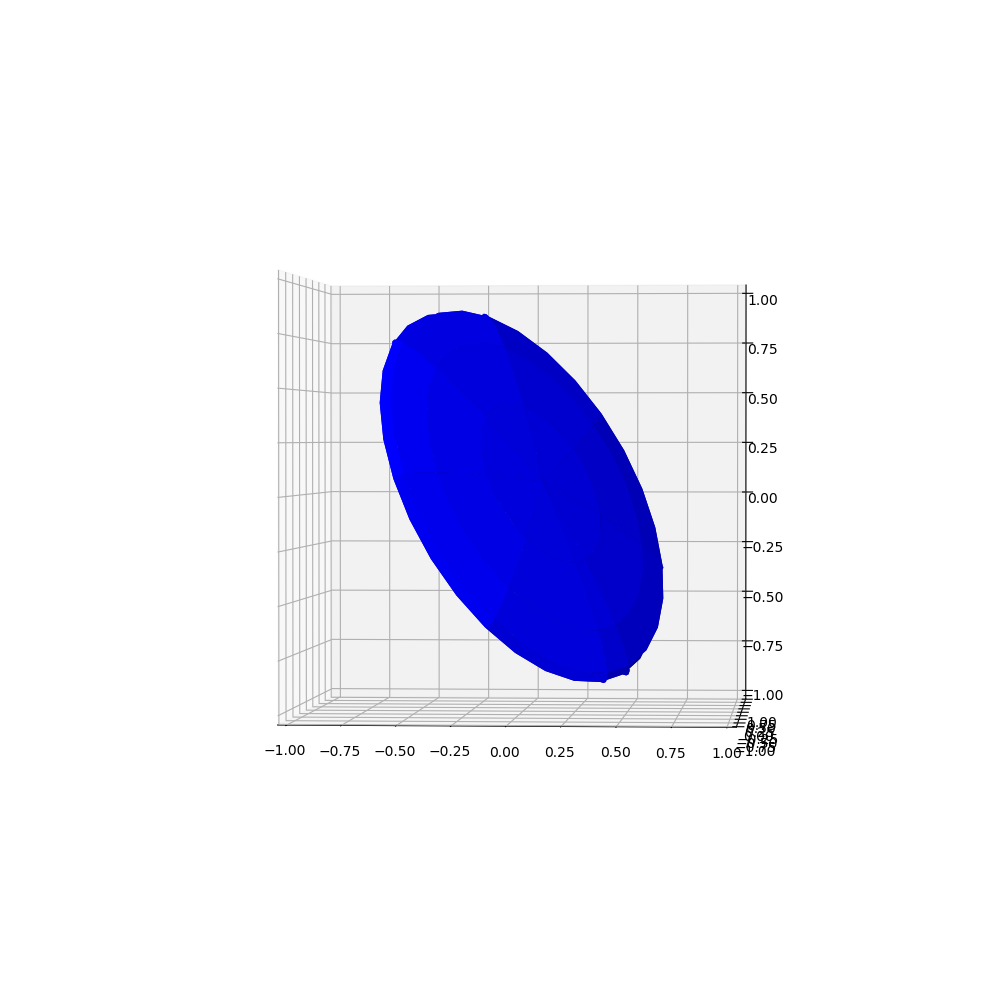

(3, 900)


In [81]:


coefs = (1, 3, 15)  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
# Radii corresponding to the coefficients:
rx, ry, rz = 1/np.sqrt(coefs)

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 30)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))


fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

xr = np.reshape(x, (1,-1))
yr = np.reshape(y, (1,-1))
zr = np.reshape(z, (1,-1))

RX = rotationGlobalX(np.pi/3)
RY = rotationGlobalY(np.pi/3)
RZ = rotationGlobalZ(np.pi/3)
Rx = rotationLocalX(np.pi/3)
Ry = rotationLocalY(np.pi/3)
Rz = rotationLocalZ(np.pi/3)

rRotx = RY@RX@np.vstack((xr,yr,zr))
print(np.shape(rRotx))
# Plot:
ax.plot_surface(np.reshape(rRotx[0,:],(30,30)), np.reshape(rRotx[1,:],(30,30)), 
                np.reshape(rRotx[2,:],(30,30)), rstride=4, cstride=4, color='b')

# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

plt.show()

In [31]:
np.sin(np.arccos(0.7))

0.71414284285428498

In [58]:
print(RZ@RY@RX)

[[ 0.25       -0.0580127   0.96650635]
 [ 0.4330127   0.89951905 -0.0580127 ]
 [-0.8660254   0.4330127   0.25      ]]


In [63]:
import sympy as sym
sym.init_printing()

In [64]:
a,b,g = sym.symbols('alpha, beta, gamma')

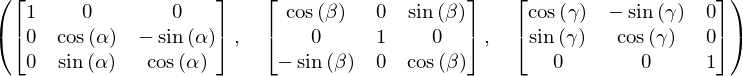

In [117]:
RX = sym.Matrix([[1,0,0],[0,sym.cos(a),-sym.sin(a)],[0,sym.sin(a),sym.cos(a)]])
RY = sym.Matrix([[sym.cos(b),0,sym.sin(b)],[0,1,0],[-sym.sin(b),0,sym.cos(b)]])
RZ = sym.Matrix([[sym.cos(g),-sym.sin(g),0],[sym.sin(g),sym.cos(g),0],[0,0,1]])
RX,RY,RZ

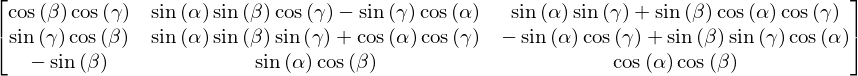

In [120]:
R = RZ@RY@RX
R

In [82]:
mm = np.array([2.71, 10.22, 26.52])
lm = np.array([2.92, 10.10, 18.85])
fh = np.array([5.05, 41.90, 15.41])
mc = np.array([8.29, 41.88, 26.52])
ajc = (mm + lm)/2
kjc = (fh + mc)/2

In [95]:
i = np.array([1,0,0])
j = np.array([0,1,0])
k = np.array([0,0,1])
v1 = kjc - ajc
v1 = v1 / np.sqrt(v1[0]**2+v1[1]**2+v1[2]**2)
v2 = (mm-lm) - ((mm-lm)@v1)*v1
v2 = v2/ np.sqrt(v2[0]**2+v2[1]**2+v2[2]**2)
v3 = k - (k@v1)*v1 - (k@v2)*v2
v3 = v3/ np.sqrt(v3[0]**2+v3[1]**2+v3[2]**2)

In [99]:
v1

array([ 0.12043275,  0.99126617, -0.05373394])

In [105]:
R = np.array([v1,v2,v3])
RGlobal = R.T
RGlobal

array([[ 0.12043275, -0.02238689,  0.99246903],
       [ 0.99126617,  0.05682604, -0.11900497],
       [-0.05373394,  0.99813307,  0.02903508]])

In [110]:
alpha = np.arctan2(RGlobal[2,1],RGlobal[2,2])*180/np.pi
alpha

In [109]:
beta = np.arctan2(-RGlobal[2,0],np.sqrt(RGlobal[2,1]**2+RGlobal[2,2]**2))*180/np.pi
beta

In [111]:
gamma = np.arctan2(RGlobal[1,0],RGlobal[0,0])*180/np.pi
gamma

In [138]:
R2 = np.array([[0, 0.71, 0.7],[0,0.7,-0.71],[-1,0,0]])
R2

array([[ 0.  ,  0.71,  0.7 ],
       [ 0.  ,  0.7 , -0.71],
       [-1.  ,  0.  ,  0.  ]])

In [125]:
alpha = np.arctan2(R[2,1],R[2,2])*180/np.pi
alpha

In [127]:
gamma = np.arctan2(R[1,0],R[0,0])*180/np.pi
gamma

In [129]:
beta = np.arctan2(-R[2,0],np.sqrt(R[2,1]**2+R[2,2]**2))*180/np.pi
beta

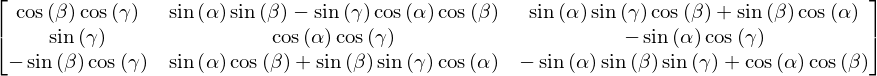

In [136]:
R = RY@RZ@RX
R

In [140]:
alpha = np.arctan2(-R2[1,2],R2[1,1])*180/np.pi
alpha

In [141]:
gamma = 0

In [142]:
beta = 90

In [1]:
import sympy as sym


In [2]:
sym.init_printing()

In [3]:
a,b,g = sym.symbols('alpha, beta, gamma')

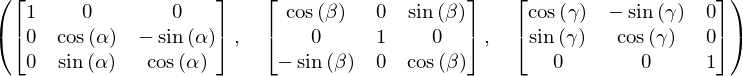

In [9]:
RX = sym.Matrix([[1,0,0],[0,sym.cos(a), -sym.sin(a)],[0,sym.sin(a), sym.cos(a)]])
RY = sym.Matrix([[sym.cos(b),0, sym.sin(b)],[0,1,0],[-sym.sin(b),0, sym.cos(b)]])
RZ = sym.Matrix([[sym.cos(g), -sym.sin(g), 0],[sym.sin(g), sym.cos(g),0],[0,0,1]])
RX,RY,RZ

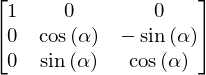

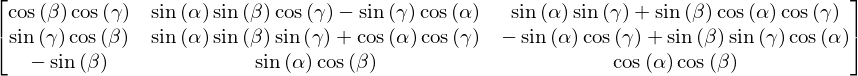

In [11]:
RXYZ = RZ*RY*RX
RXYZ

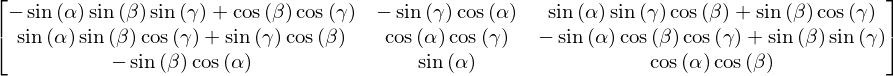

In [15]:
RZXY = RZ*RX*RY
RZXY